In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
airline_scale = np.load('./airline_scale.npz')['arr_0']
k = 5
kmeans_model = KMeans(n_clusters=k, random_state=123)
fit_kmeans = kmeans_model.fit(airline_scale)
kmeans_cc = kmeans_model.cluster_centers_
print('各类聚类中心为:\n', kmeans_cc)
kmeans_labels = kmeans_model.labels_
print('各样本的类别标签为:\n', kmeans_labels)
print('最终各个类别的数目为:\n', pd.Series(kmeans_model.labels_).value_counts())

# 输出聚类分群结果
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_, columns=['ZL', 'ZR', 'ZF', 'ZM', 'ZC'])
cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:, 0]
print(cluster_center)

/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


各类聚类中心为:
 [[-0.70030628 -0.41502288 -0.16081841 -0.16053724 -0.25728596]
 [ 0.0444681  -0.00249102 -0.23046649 -0.23492871  2.17528742]
 [ 0.48370858 -0.79939042  2.48317171  2.42445742  0.30923962]
 [ 1.1608298  -0.37751261 -0.08668008 -0.09460809 -0.15678402]
 [-0.31319365  1.68685465 -0.57392007 -0.5367502  -0.17484815]]
各样本的类别标签为:
 [2 2 2 ... 0 4 4]
最终各个类别的数目为:
 0    24630
3    15733
4    12117
2     5337
1     4226
dtype: int64
         ZL        ZR        ZF        ZM        ZC
0                                                  
2 -0.700306 -0.415023 -0.160818 -0.160537 -0.257286
1  0.044468 -0.002491 -0.230466 -0.234929  2.175287
3  0.483709 -0.799390  2.483172  2.424457  0.309240
0  1.160830 -0.377513 -0.086680 -0.094608 -0.156784
4 -0.313194  1.686855 -0.573920 -0.536750 -0.174848


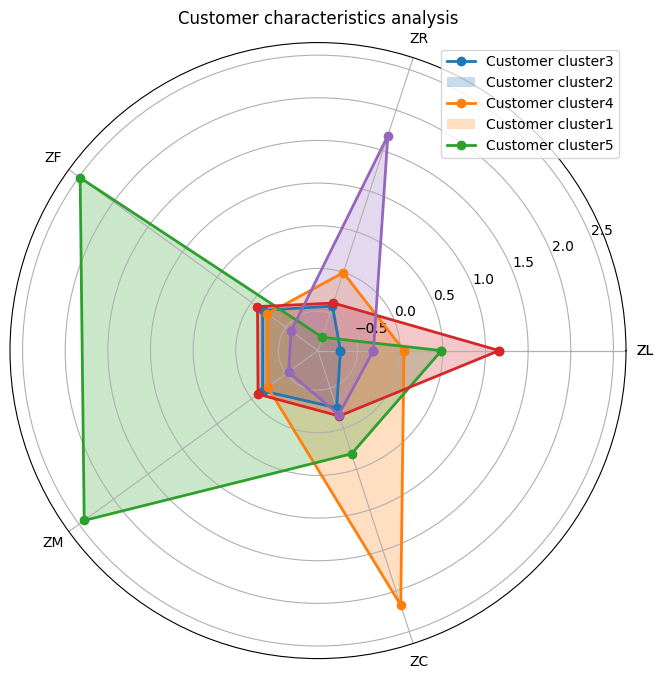

In [3]:
# 客户分群雷达图
labels = cluster_center.keys()
legen = ['Customer cluster' + str(i + 1) for i in cluster_center.index]
lstype = ['-', '--', (0, (3, 5, 1, 5, 1, 5)), ':', '-.']
kinds = list(cluster_center.iloc[:, 0])
cluster_center_close = pd.concat([cluster_center, cluster_center['ZL']], axis=1)
centers = np.array(cluster_center_close.iloc[:, 0:])
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
for i in range(len(kinds)):
    ax.plot(angle, centers[i], 'o-', linewidth=2, label=kinds)
    ax.fill(angle, centers[i], alpha=0.25)
ax.set_thetagrids(angle * 180 / np.pi, cluster_center_close.keys())
plt.title('Customer characteristics analysis')
plt.legend(legen, bbox_to_anchor=(1, 1), fancybox=True)
plt.show()
fig.savefig('cluster analysis.png', dpi=500)

In [4]:
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,,,,,
2,-0.700306,-0.415023,-0.160818,-0.160537,-0.257286
1,0.044468,-0.002491,-0.230466,-0.234929,2.175287
3,0.483709,-0.799390,2.483172,2.424457,0.309240
0,1.160830,-0.377513,-0.086680,-0.094608,-0.156784
4,-0.313194,1.686855,-0.573920,-0.536750,-0.174848
